<a href="https://colab.research.google.com/github/richardkilea/Learning/blob/main/Licence_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement
We are given a license dataset which holds various information related the business license , The objective of the problem is to predict license Status for the given business.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# load data set
df = pd.read_csv('/content/License_Data.csv')

<ipython-input-2-3dfa344614bd>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/License_Data.csv')


# EXLORATORY DATA ANALYSIS

In [3]:
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [5]:
df.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [6]:
df.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [7]:
df.shape

(85895, 32)

In [8]:
len(df)

85895

In [9]:
df.nunique

<bound method DataFrame.nunique of                      ID  LICENSE ID  ACCOUNT NUMBER  SITE NUMBER  \
0        35342-20020816     1256593           32811            1   
1      1358463-20051116     1639294          262311           29   
2      1980233-20090722     1980233          345008            1   
3      1476582-20040211     1476582          273121            1   
4      1141408-20080516     1896750          213785            1   
...                 ...         ...             ...          ...   
85890    12652-20120516     2143400            8011            1   
85891  1821421-20070522     1821421          317725            1   
85892    74137-20090116     1939358            8458            2   
85893  2049545-20111016     2110060            2156           43   
85894  1070196-20040216     1461628          205936            1   

                           LEGAL NAME          DOING BUSINESS AS NAME  \
0                        CARMEN CAHUE           CLAUDIA'S BRIDAL SHOP   
1 

In [10]:
display(df.head().T)

,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


In [11]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

<ipython-input-11-95792adbd8ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
LICENSE ID,1.000000,0.359277,0.067159,0.005275,-0.138596,-0.041838,0.010405,0.476062,0.034191,-0.023492,0.004883
ACCOUNT NUMBER,0.359277,1.000000,-0.149178,0.009602,-0.094132,-0.029867,0.063140,0.790922,0.051646,-0.012561,0.017993
SITE NUMBER,0.067159,-0.149178,1.000000,-0.015393,-0.030387,0.011103,0.109418,0.042001,0.023474,-0.005174,0.042247
WARD,0.005275,0.009602,-0.015393,1.000000,0.053996,0.487728,-0.040709,0.007125,-0.147276,0.667520,-0.233630
PRECINCT,-0.138596,-0.094132,-0.030387,0.053996,1.000000,0.184356,-0.026586,-0.121079,0.095194,0.097531,-0.105979
POLICE DISTRICT,-0.041838,-0.029867,0.011103,0.487728,0.184356,1.000000,0.048442,-0.042338,-0.014021,0.619882,-0.455247
LICENSE CODE,0.010405,0.063140,0.109418,-0.040709,-0.026586,0.048442,1.000000,0.069720,0.062682,-0.009484,-0.001010
LICENSE NUMBER,0.476062,0.790922,0.042001,0.007125,-0.121079,-0.042338,0.069720,1.000000,0.047638,-0.010265,0.029111
SSA,0.034191,0.051646,0.023474,-0.147276,0.095194,-0.014021,0.062682,0.047638,1.000000,-0.039811,0.078811
LATITUDE,-0.023492,-0.012561,-0.005174,0.667520,0.097531,0.619882,-0.009484,-0.010265,-0.039811,1.000000,-0.404510


<ipython-input-12-ce1eccacef98>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


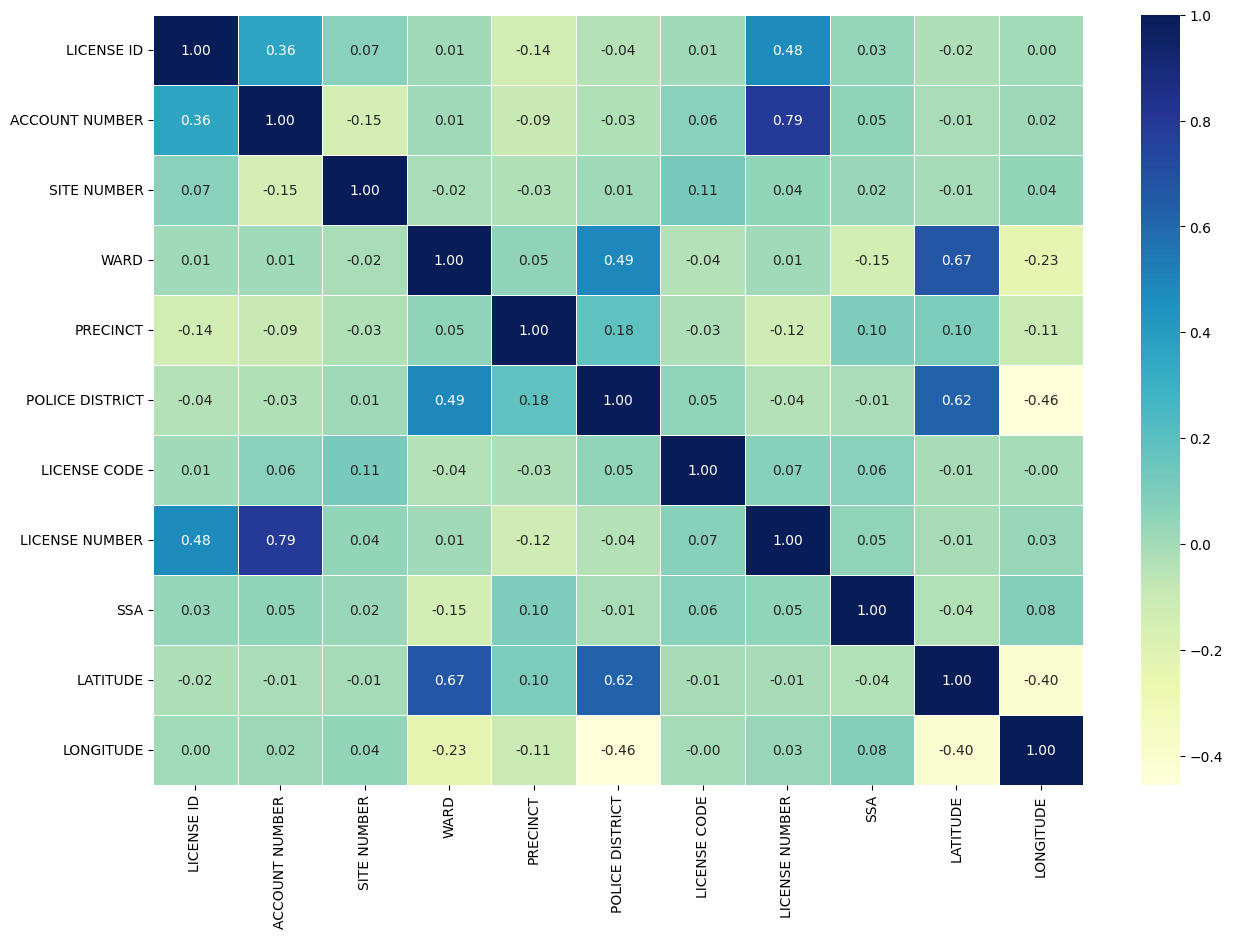

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

# Data processing

In [13]:
# change the columns name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name

In [14]:
# dropping unncessary columns
df = df.drop(["id", "license_id", "ssa", "location", "application_created_date", "account_number", "address"], axis=1)

In [15]:
df.head()

,site_number,legal_name,doing_business_as_name,city,state,zip_code,ward,precinct,ward_precinct,police_district,...,payment_date,conditional_approval,license_term_start_date,license_term_expiration_date,license_approved_for_issuance,date_issued,license_status_change_date,latitude,longitude,license_status
0,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,...,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,41.843613,-87.714618,AAI
1,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,...,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,41.961132,-87.699626,AAC
2,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,...,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,AAI
3,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,NaN,...,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,AAI
4,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,...,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,AAI


In [16]:
df.isna().sum()

site_number                              0
legal_name                               0
doing_business_as_name                   1
city                                     0
state                                    0
zip_code                                31
ward                                 49701
precinct                             56701
ward_precinct                        49700
police_district                      54012
license_code                             0
license_description                      0
license_number                           1
application_type                         0
application_requirements_complete      214
payment_date                          1289
conditional_approval                     0
license_term_start_date                228
license_term_expiration_date            18
license_approved_for_issuance         6789
date_issued                              0
license_status_change_date           55400
latitude                             47246
longitude  

In [17]:
df["license_status_change"] = np.where(df.license_status_change_date.isnull(),1,0)

In [18]:
pd.crosstab(df.license_status_change,df.license_status)

license_status,AAC,AAI,INQ,REA,REV
license_status_change,,,,,
0,30200,0,2,3,290
1,0,55400,0,0,0


In [19]:
df.head()

,site_number,legal_name,doing_business_as_name,city,state,zip_code,ward,precinct,ward_precinct,police_district,...,conditional_approval,license_term_start_date,license_term_expiration_date,license_approved_for_issuance,date_issued,license_status_change_date,latitude,longitude,license_status,license_status_change
0,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,...,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,41.843613,-87.714618,AAI,1
1,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,...,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,41.961132,-87.699626,AAC,0
2,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,...,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,AAI,1
3,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,NaN,...,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,AAI,1
4,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,...,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,AAI,1


In [20]:
df.head().T

,0,1,2,3,4
site_number,1,29,1,1,1
legal_name,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
doing_business_as_name,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
city,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
state,IL,IL,IL,IL,IL
zip_code,60623.0,60618,60035,60439,60087
ward,22.0,33.0,NaN,NaN,NaN
precinct,28.0,23.0,NaN,NaN,NaN
ward_precinct,22-28,33-23,NaN,NaN,NaN
police_district,10.0,17.0,NaN,NaN,NaN


In [21]:
# convert string object into date
df.application_requirements_complete = pd.DatetimeIndex(df.application_requirements_complete)
df.payment_date = pd.DatetimeIndex(df.payment_date)
df.license_term_start_date = pd.DatetimeIndex(df.license_term_start_date)
df.license_term_expiration_date = pd.DatetimeIndex(df.license_term_expiration_date)
df.license_approved_for_issuance = pd.DatetimeIndex(df.license_approved_for_issuance)
df.date_issued = pd.DatetimeIndex(df.date_issued)

In [22]:
# Find no.of days btw different application status date
df["completion_to_start"] = (df.license_term_start_date - df.application_requirements_complete).dt.days
df["start_to_expiry"] =  (df.license_term_expiration_date - df.license_term_start_date).dt.days
df["approval_to_issuance"] = (df.date_issued - df.license_approved_for_issuance).dt.days
df["completion_to_payment"] = (df.payment_date - df.application_requirements_complete).dt.days

df["presence_of_enquiry_details"] = np.where(df.ward.isnull() | df.ward_precinct.isnull() | df.police_district | df.precinct , 0 ,1 )

df["target"] = df[['license_status']].apply(lambda col:pd.Categorical(col).codes)

In [23]:
df.city.unique()

array(['CHICAGO', 'HIGHLAND', 'LEMONT', ..., 'ABERDEEN', 'PENSACOLA',
       'MACHESNEY PARK'], dtype=object)

In [24]:
df.dtypes

site_number                                   int64
legal_name                                   object
doing_business_as_name                       object
city                                         object
state                                        object
zip_code                                     object
ward                                        float64
precinct                                    float64
ward_precinct                                object
police_district                             float64
license_code                                  int64
license_description                          object
license_number                              float64
application_type                             object
application_requirements_complete    datetime64[ns]
payment_date                         datetime64[ns]
conditional_approval                         object
license_term_start_date              datetime64[ns]
license_term_expiration_date         datetime64[ns]
license_appr

In [25]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [26]:
import category_encoders as ce

In [27]:
enc=ce.OneHotEncoder().fit(df.target.astype(str))
y_onehot=enc.transform(df.target.astype(str))
print(y_onehot.columns)

Index(['target_1', 'target_2', 'target_3', 'target_4', 'target_5'], dtype='object')


# Target encoding

In [28]:
# astype(str) in case of numeric labels
enc = ce.OneHotEncoder().fit(df.target.astype(str))

# Transform target into onehot encoded form
y_onehot = enc.transform(df.target.astype(str))

class_names = y_onehot.columns

# For each class in target variable
for class_ in class_names:

  # Initialize a Target Encoder
  enc = ce.TargetEncoder(smoothing=0)

  # Fit & Transform features with respect to each class in target
  temp = enc.fit_transform(df[["license_description", "state", "city"]], y_onehot[class_])

  # Rename columns to show which class was used as the target
  temp.columns = [str(x) + '_' + str(class_) for x in temp.columns]

  # Concatenate the original DataFrame and the newly encoded features
  df = pd.concat([df, temp], axis=1)

In [29]:
df.license_status.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: license_status, dtype: int64

In [30]:
df.license_status.value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

AAI    64.497%
AAC    35.159%
REV     0.338%
REA     0.003%
INQ     0.002%
Name: license_status, dtype: object

In [31]:
np.sort(df.target.unique()).tolist()

[0, 1, 2, 3, 4]

# working on undersampling and oversampling

In [32]:
# Undersampling
df_0 = df[df.target==0].sample(frac=0.3,replace=False)
df_1 = df[df.target==1].sample(frac=0.3,replace=False)
# oversamplig
df_2 = df[df.target==2].sample(frac=200,replace=True)
df_3 = df[df.target==3].sample(frac=100,replace=True)
df_4 = df[df.target==4].sample(frac=2,replace=True)

sampled_df = pd.concat([df_0,df_1,df_2,df_3,df_4])

sampled_df.target.value_counts()

1    16620
0     9060
4      580
2      400
3      300
Name: target, dtype: int64

# mean imputation

## Variable Description

<b>Dependent Variable</b>   <br>
&nbsp;&nbsp;&nbsp;&nbsp;    1. AAI - License status is issued <br>
&nbsp;&nbsp;&nbsp;&nbsp;    2. AAC - License status is cancelled <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3. REV - License status is revoked <br>
&nbsp;&nbsp;&nbsp;&nbsp;    4. REA - License status is revoked and appealed <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5. INQ - License status is in enquiry <br>
    <br>
<b>Independent Variable</b> : <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Timeline of the application status <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Type of business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Location details of the business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Payment details <br>
_______________________________________________________________________________________________________________________________

In [33]:
X = sampled_df[['latitude', 'longitude',
       'completion_to_start',
       'start_to_expiry', 'approval_to_issuance', 'completion_to_payment',
       'presence_of_enquiry_details',  'license_description_target_1',
       'state_target_1', 'city_target_1', 'license_description_target_2',
       'state_target_2', 'city_target_2', 'license_description_target_3',
       'state_target_3', 'city_target_3', 'license_description_target_4',
       'state_target_4', 'city_target_4', 'license_description_target_5',
       'state_target_5', 'city_target_5']]

y = sampled_df['target']

In [34]:
X = X.fillna(X.mean())

In [35]:
from xgboost import XGBRegressor

In [36]:
# Train/test preparation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [37]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "XGB Regressor": XGBRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [38]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7748516320474778,
 'Logistic Regression': 0.6327893175074184,
 'Random Forest': 0.8885385756676558,
 'XGB Regressor': 0.6990421700178338}

# MODEL COMPARISON

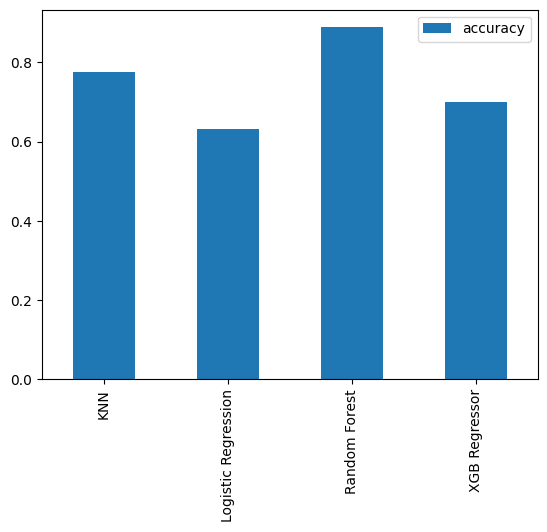

In [39]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# Hyperparameter tuning and cross validation

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining the classifier
knn = KNeighborsClassifier()

# Define parameter grid (here we search from 1 to 10 neighbors)
params = {'n_neighbors': list(range(1, 11)),
          'weights': ['uniform', 'distance']}

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, params, cv=5)  # 5-fold cross-validation

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Getting the best parameters
print('Best Parameters:', grid_search.best_params_)

# You can now create a new KNN classifier with the "best" parameters
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                weights=grid_search.best_params_['weights'])
best_knn.fit(X_train, y_train)

Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [41]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the responses for test dataset
y_pred = best_knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7969213649851632

Confusion Matrix:
 [[1178  635    0    2   24]
 [ 408 2887    0    0   10]
 [   0    0   79    0    0]
 [   0    0    0   60    0]
 [  14    2    0    0   93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      1839
           1       0.82      0.87      0.85      3305
           2       1.00      1.00      1.00        79
           3       0.97      1.00      0.98        60
           4       0.73      0.85      0.79       109

    accuracy                           0.80      5392
   macro avg       0.85      0.87      0.86      5392
weighted avg       0.79      0.80      0.79      5392



# lets tune our Random forest classifier

In [42]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [45]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8898367952522255

## confusion matrix

In [46]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predicting the test set result
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate precision, recall, and f1-score using classification report
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Confusion matrix:
 [[1554  278    0    1    6]
 [ 295 3009    0    0    1]
 [   0    0   79    0    0]
 [   0    0    0   60    0]
 [  13    0    0    0   96]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1839
           1       0.92      0.91      0.91      3305
           2       1.00      1.00      1.00        79
           3       0.98      1.00      0.99        60
           4       0.93      0.88      0.91       109

    accuracy                           0.89      5392
   macro avg       0.93      0.93      0.93      5392
weighted avg       0.89      0.89      0.89      5392



In [49]:
import pickle

# Save to file in the current working directory
pkl_filename = "Licence_Status.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)